### 1-DESCRIPCION DE DATASET: REGRISTO DE RESTAURANTE ###

In [133]:
import numpy as np

In [134]:
import matplotlib.pyplot as plt

In [135]:
import seaborn as sns

In [136]:
import pandas as pd

In [98]:
sns.get_dataset_names() 

['anagrams',
 'anscombe',
 'attention',
 'brain_networks',
 'car_crashes',
 'diamonds',
 'dots',
 'dowjones',
 'exercise',
 'flights',
 'fmri',
 'geyser',
 'glue',
 'healthexp',
 'iris',
 'mpg',
 'penguins',
 'planets',
 'seaice',
 'taxis',
 'tips',
 'titanic']

In [99]:
tips=sns.load_dataset("tips")
tips.head(6)


,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4
5,25.29,4.71,Male,No,Sun,Dinner,4


In [100]:
tips.columns #  Lo primero que hacemos despues de cargar el dataframe, es ver todas las variables que tiene.

Index(['total_bill', 'tip', 'sex', 'smoker', 'day', 'time', 'size'], dtype='object')

In [101]:
tips.columns=["Cuenta total","Propina","Sexo","Fumador","Dia","Horario","Talla"]
tips.head(13)

,Cuenta total,Propina,Sexo,Fumador,Dia,Horario,Talla
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4
5,25.29,4.71,Male,No,Sun,Dinner,4
6,8.77,2.00,Male,No,Sun,Dinner,2
7,26.88,3.12,Male,No,Sun,Dinner,4
8,15.04,1.96,Male,No,Sun,Dinner,2
9,14.78,3.23,Male,No,Sun,Dinner,2


In [102]:
tips.info() # Podemos observar que no hay datos faltantes entre las variables, 244 individos por variable

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 244 entries, 0 to 243
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype   
---  ------        --------------  -----   
 0   Cuenta total  244 non-null    float64 
 1   Propina       244 non-null    float64 
 2   Sexo          244 non-null    category
 3   Fumador       244 non-null    category
 4   Dia           244 non-null    category
 5   Horario       244 non-null    category
 6   Talla         244 non-null    int64   
dtypes: category(4), float64(2), int64(1)
memory usage: 7.4 KB


In [103]:
tips.shape[0] # cantidad de clientes analizados, cada uno con 7 variables.

244

In [104]:
tips.isnull().sum()                                                                    # podemos ver que no hay datos faltantes para cada variable. 

Cuenta total    0
Propina         0
Sexo            0
Fumador         0
Dia             0
Horario         0
Talla           0
dtype: int64

In [105]:
tips.size                                                                              # numero total de datos

1708

In [106]:
tips.describe() #Las desviaciones standar son distinta de cero (std desigual a 0), osea que las variables no estan conformadas de un unico valor numerico"


,Cuenta total,Propina,Talla
count,244.000000,244.000000,244.000000
mean,19.785943,2.998279,2.569672
std,8.902412,1.383638,0.951100
min,3.070000,1.000000,1.000000
25%,13.347500,2.000000,2.000000
50%,17.795000,2.900000,2.000000
75%,24.127500,3.562500,3.000000
max,50.810000,10.000000,6.000000


**Observaciones:**

- Se puede observar las desviaciones de cada variable son muy distintas,por lo que habria que normalizar para aplicarlo a un modelo de aprendizaje automatico.

### 2-LIMPIEZA DE DATOS CUANTITATIVOS ###

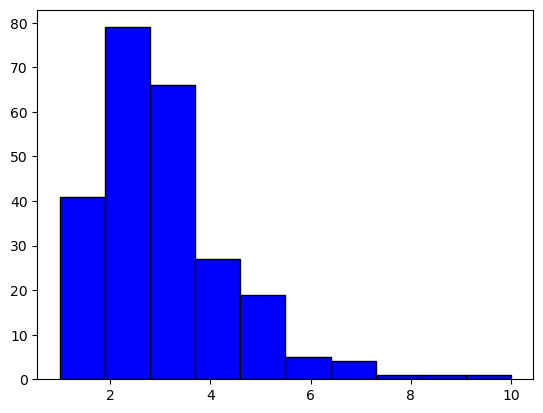

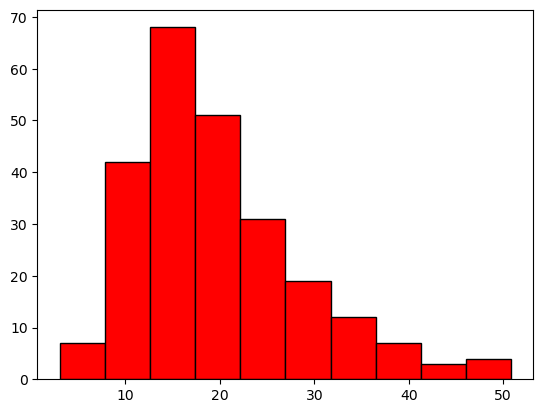

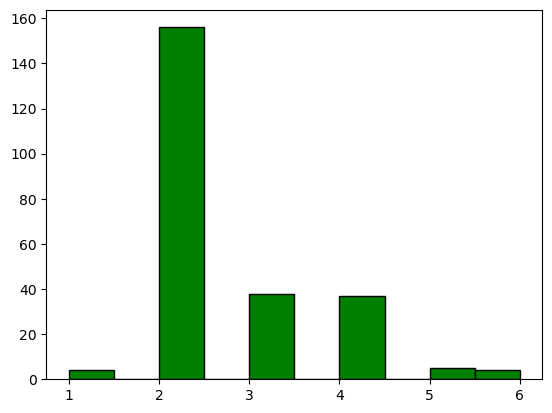

In [107]:
plt.hist (tips["Propina"],color="blue", ec="black")
plt.show()
plt.hist (tips["Cuenta total"],color="red", ec="black")
plt.show()
plt.hist (tips["Talla"],color="green", ec="black")
plt.show()

**Observaciones:**

-Podemos ver que las caracteristicas de la distribucion de tallas, se asemeja mas a una distribucion categorica.

In [108]:
print("Generamos la moda de las variables")

Generamos la moda de las variables


In [109]:
tips["Cuenta total"].mode()

0    13.42
Name: Cuenta total, dtype: float64

In [110]:
tips["Propina"].mode()

0    2.0
Name: Propina, dtype: float64

In [111]:
tips["Talla"].mode()

0    2
Name: Talla, dtype: int64

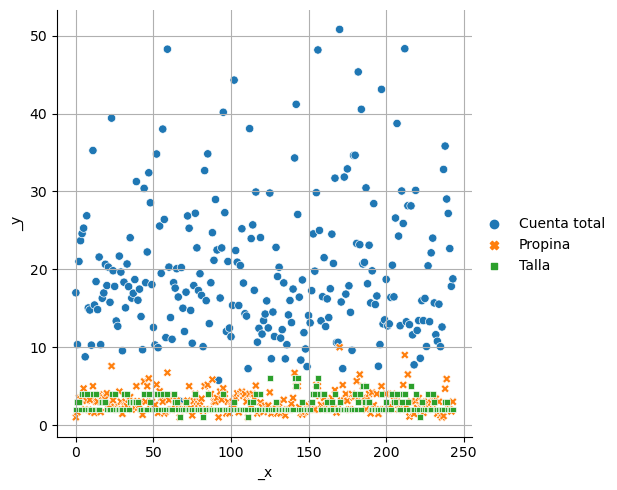

In [112]:
relacion=sns.relplot(data=tips)
plt.grid(True)
plt.show()

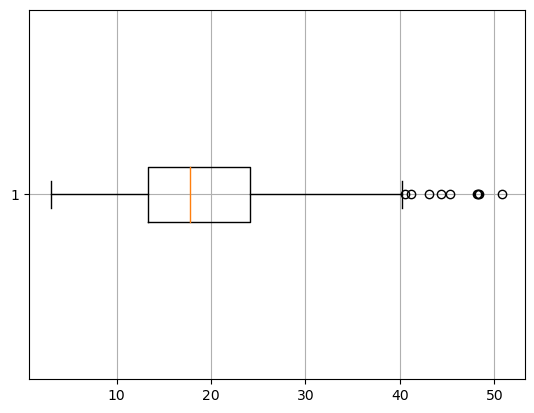

Podemos obervar que aquellas personas que pagaron >$43, son casos excepcionales


In [113]:
plt.boxplot(tips["Cuenta total"],vert=False)                      # Utilizamos esta herramienta para ver coherenciaS (Ej:Valores negativos)
                                                                  # Ademas lo utilizamos para idenficar los datos anomalos que puede alterar las conclusione
plt.grid(True)
plt.show()
print("Podemos obervar que aquellas personas que pagaron >$43, son casos excepcionales")

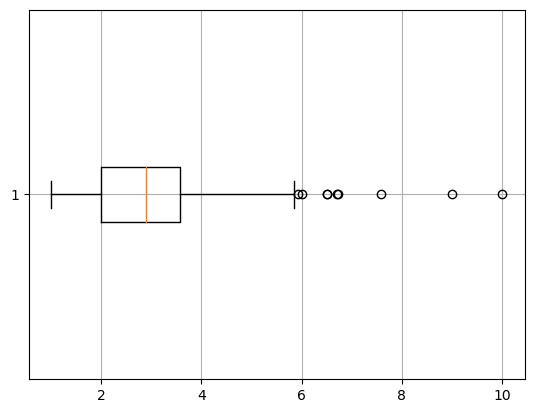

podemos obsvar que aquellos que pagaron proponinas >$6,3, son excepcionales


In [114]:
plt.boxplot(tips["Propina"],vert=False)  
plt.grid(True)
plt.show()
print("podemos obsvar que aquellos que pagaron proponinas >$6,3, son excepcionales")

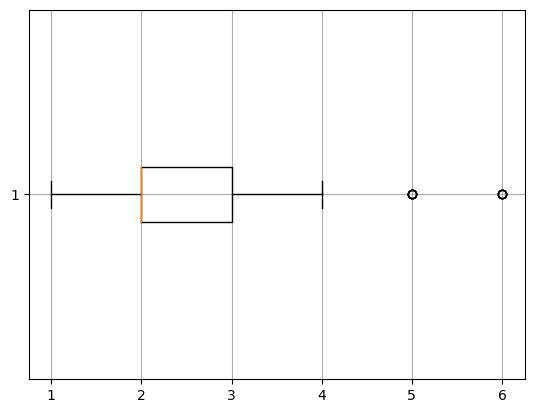

podemos obsvar que aquellos que pagaron proponinas >5, son excepcionales


In [115]:
plt.boxplot(tips["Talla"],vert=False)  
plt.grid(True)
plt.show()
print("podemos obsvar que aquellos que pagaron proponinas >5, son excepcionales")

### 1.2GENERAMOS DATAFRAME CON LAS SIGUIENTES MODIFICACIONES:
- Cuenta total  <=43
- Propina mayor < 6.3

In [116]:
tips = tips[tips['Cuenta total']<=43]
print(tips.shape)


(237, 7)


In [117]:
tips = tips[tips['Propina']<6.3]
print(tips.shape)

(233, 7)


In [118]:
tips.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 233 entries, 0 to 243
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype   
---  ------        --------------  -----   
 0   Cuenta total  233 non-null    float64 
 1   Propina       233 non-null    float64 
 2   Sexo          233 non-null    category
 3   Fumador       233 non-null    category
 4   Dia           233 non-null    category
 5   Horario       233 non-null    category
 6   Talla         233 non-null    int64   
dtypes: category(4), float64(2), int64(1)
memory usage: 8.8 KB


In [119]:
tips.head() # Nuevo data frame

,Cuenta total,Propina,Sexo,Fumador,Dia,Horario,Talla
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


**Observaciones:**

- Mediante limpieza de datos cuantitativos ,pasamos (244,7) a (233,7), perdimos 4% de los datos (70).

- La razon de elimininacion de esos datos, se debio a que eran datos anomalos.que alteran las conclusiones.

### 3-LIMPIEZA DE DATOS CATEGORICOS ###

In [120]:
# Conteo de los niveles en las diferentes columnas categóricas
cols_cat = ["Sexo","Fumador","Dia","Horario"]
for col in cols_cat:
   print(f'Columna {col}: {tips[col].nunique()} subniveles')  

Columna Sexo: 2 subniveles
Columna Fumador: 2 subniveles
Columna Dia: 4 subniveles
Columna Horario: 2 subniveles


***Observacion:***

- Todas las columnas categoricas tienen mas de 1 subnivel. No eliminaremos ninguna. 


C:\Users\erram\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


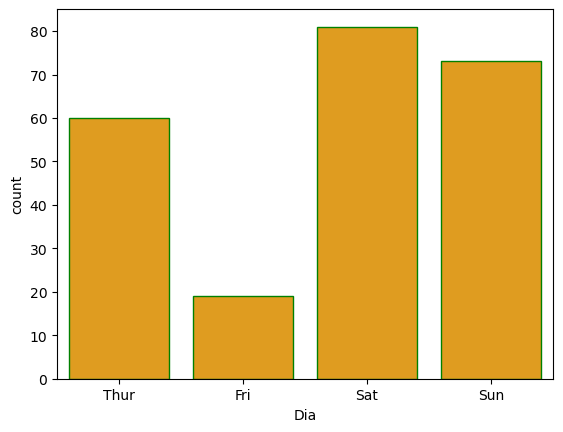

C:\Users\erram\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


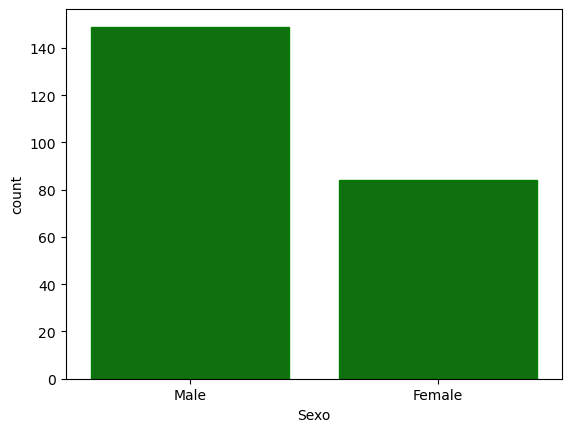

C:\Users\erram\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


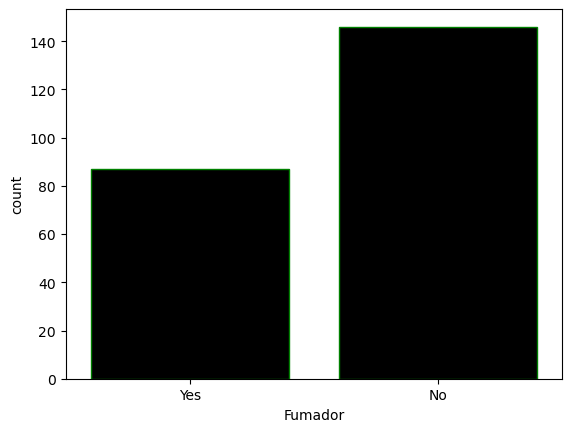

C:\Users\erram\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


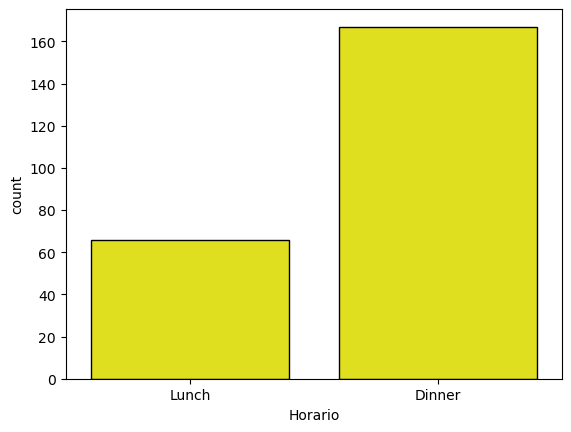

In [121]:
sns.countplot(tips["Dia"],color="orange", ec="green")
plt.show()
sns.countplot(tips["Sexo"],color="green", ec="green")
plt.show()
sns.countplot(tips["Fumador"],color="black", ec="green")
plt.show()
sns.countplot(tips["Horario"],color="yellow", ec="black")
plt.show()

***Observacion:***

- No se encuentran anomalias en la escrituras de las categorias, por lo que no hay que hacer transformaciones. Opcino 1 para graficas y ver estas cuestiones.

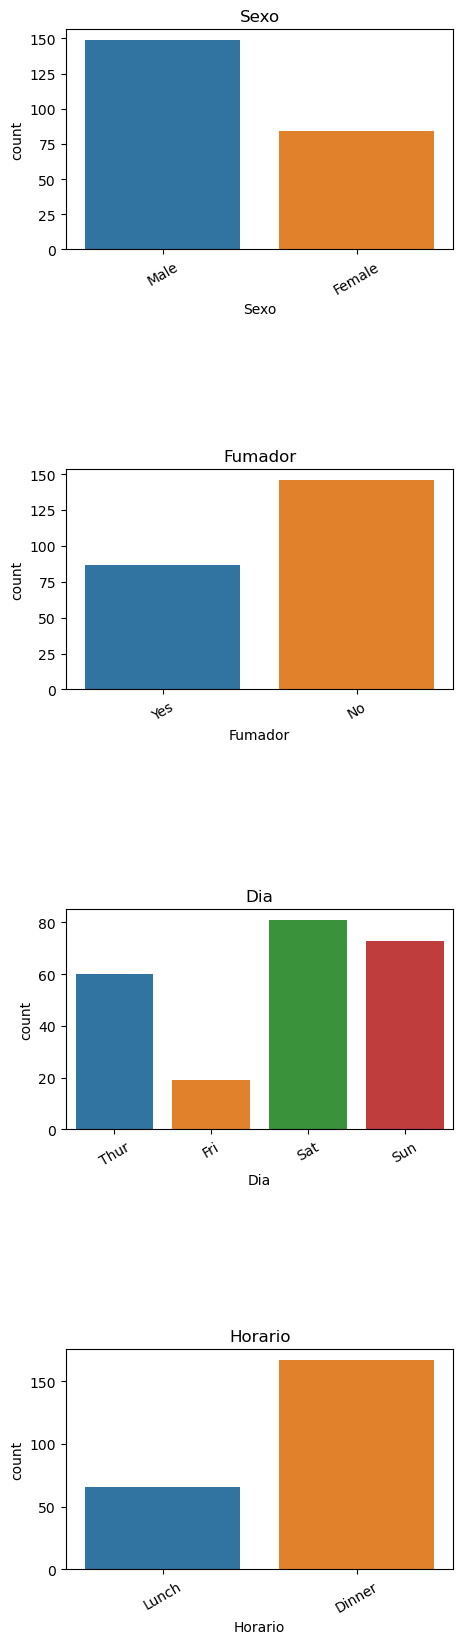

In [122]:
 cols_cat = ['Sexo', 'Fumador', 'Dia',"Horario"]

fig, ax = plt.subplots(nrows=4, ncols=1, figsize=(5,20)) #"figsize", es para modificar las dimensiones de la grafica."nrows" es para el numero de graficas,
fig.subplots_adjust(hspace=1)

for i, col in enumerate(cols_cat): # De estas funciones, no tocar nada. 
  sns.countplot(x=col, data=tips, ax=ax[i])
  ax[i].set_title(col)
  ax[i].set_xticklabels(ax[i].get_xticklabels(),rotation=30)

***Observacion:***

- Essta es otra forma de ver la gracias categoricas con sns, es mas prolija, que la opcion 1
- No se encuentran anomalias en la escrutira, como para realizar modificaciones.

In [123]:
for column in tips.columns:
    if column in cols_cat:
         tips[column] = tips[column].str.lower() #Codigo para transformar mayuscula y minuscula.

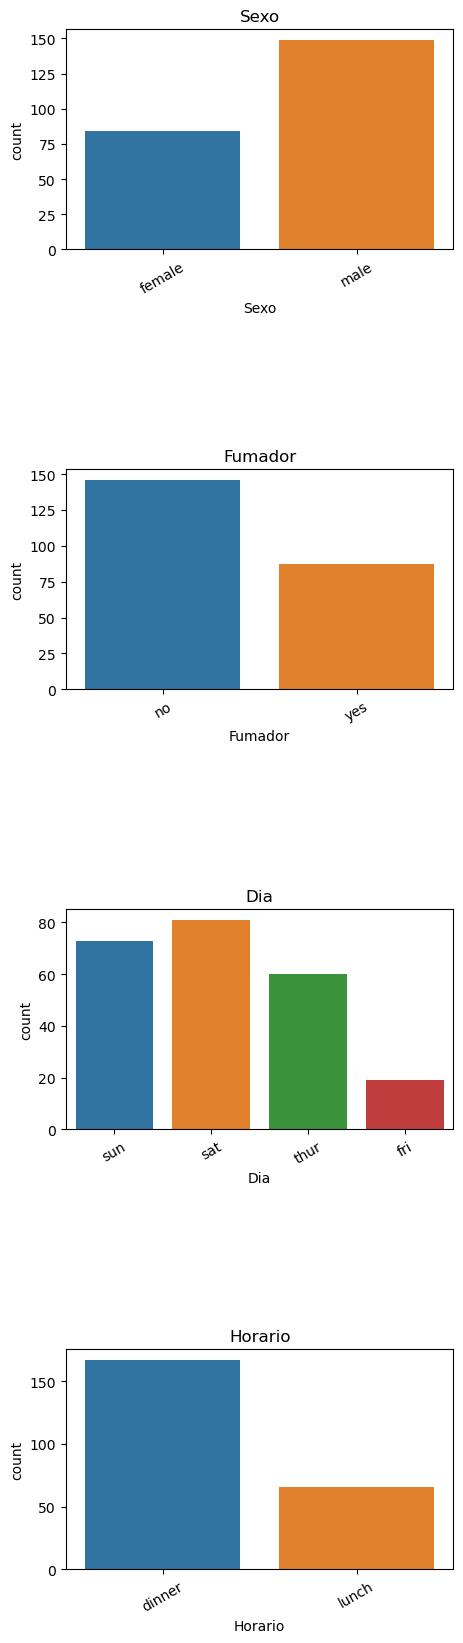

In [129]:
 #Volvimos a realizar la grafica para verificar la modificacion.
cols_cat = ['Sexo', 'Fumador', 'Dia',"Horario"]

fig, ax = plt.subplots(nrows=4, ncols=1, figsize=(5,20)) 
fig.subplots_adjust(hspace=1)

for i, col in enumerate(cols_cat): 
  sns.countplot(x=col, data=tips, ax=ax[i])
  ax[i].set_title(col)
  ax[i].set_xticklabels(ax[i].get_xticklabels(),rotation=30)

***Observacion:***

- Transformamos, a todas las variables categoricas que tenian mayuscula ls tranformamos a minuscula.
- Volvimos a realizar el grafico para observar las modificaciones.

**Vamos unificar las sub-categorias "sun" y "sat" a "finde", correspondietes a la categoria de "dia"**


In [137]:
print(tips['Dia'].unique())
tips['Dia'] = tips['Dia'].str.replace('sun','finde', regex=False)
print(tips['Dia'].unique())

['sun' 'sat' 'thur' 'fri']
['finde' 'sat' 'thur' 'fri']


In [138]:
print(tips['Dia'].unique())
tips['Dia'] = tips['Dia'].str.replace('sat','finde', regex=False)
print(tips['Dia'].unique())

['finde' 'sat' 'thur' 'fri']
['finde' 'thur' 'fri']


**Procedemos a graficar para ver las modificaciones**

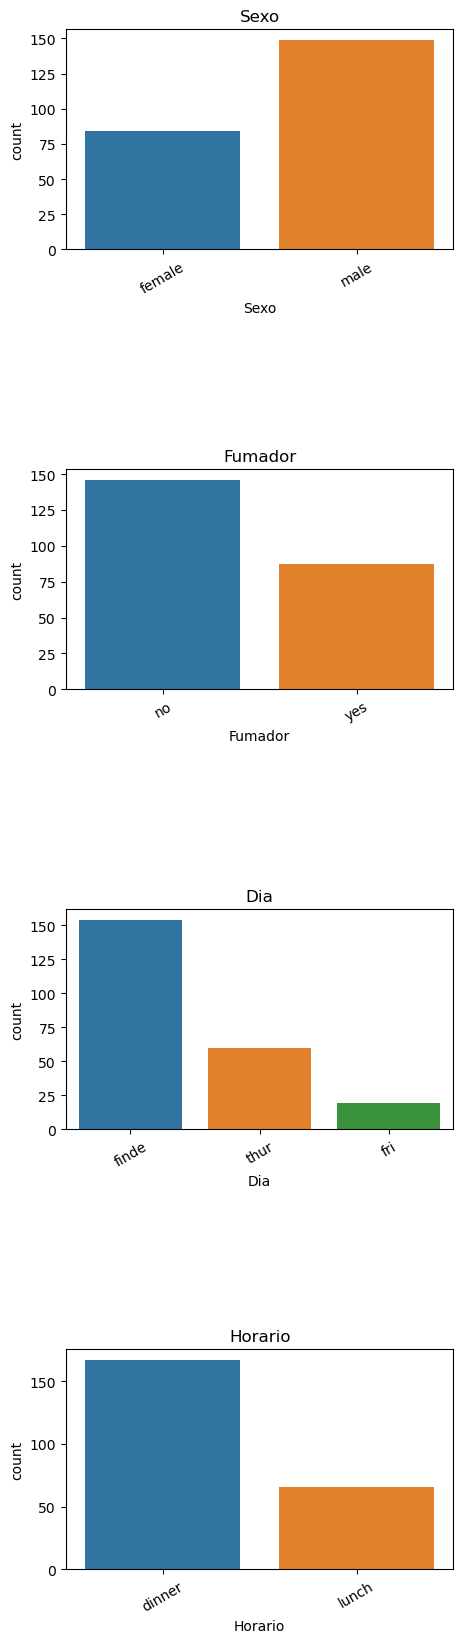

In [139]:
cols_cat = ['Sexo', 'Fumador', 'Dia',"Horario"]

fig, ax = plt.subplots(nrows=4, ncols=1, figsize=(5,20)) 
fig.subplots_adjust(hspace=1)

for i, col in enumerate(cols_cat): 
  sns.countplot(x=col, data=tips, ax=ax[i])
  ax[i].set_title(col)
  ax[i].set_xticklabels(ax[i].get_xticklabels(),rotation=30)

In [130]:
tips.shape #Podemos observar la dimensiones actualizada del dataframe.

(233, 7)

### 4-DATA CLEANING CONCLUSION. ###

**Generamos el nuevo csv, para proceder a la etapa de exploracion**

In [142]:
tips.to_csv("RESTAURANTE_MODF.csv") #Se genera el csv en la misma carpeta